**DataSet** - http://archive.ics.uci.edu/ml/datasets/Auto+MPG

**Goal :** Predicting the attribute "MPG" based on other vehicle attributes

**Attribute Information:**
1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete

**Contents**
1. Load Libraries
2. Data Load and Preprocessing
3. Data Vizualizations
4. Model Build and Evaluation
    * Linear Regression
    * SVR (Support Vector Machines - Regression)
    * Random Forest Regression
5. Scaling Data
6. Repeat Step 4
7. Summary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# defining the column names
cols = ['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration', 'Model Year', 'Origin']
# reading the .data file using pandas
data = pd.read_csv('auto-mpg.data', names=cols, na_values = "?", comment = '\t', sep= " ", skipinitialspace=True)

In [3]:
data.head() # sample data

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


### Data Preprocessing

In [5]:
data.isnull().sum() # Check Nulls

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

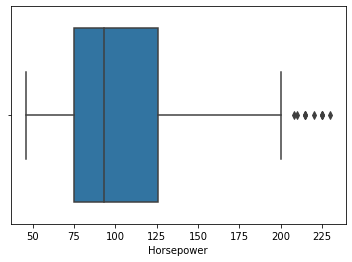

In [6]:
##looking at horsepower box plot
sns.boxplot(x=data['Horsepower'])

In [7]:
##imputing the values with median
median = data['Horsepower'].median()
data['Horsepower'] = data['Horsepower'].fillna(median)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


### Data Visualizations

Check correlations betweeen attributes. Following are the observations:
1. MPG is negatively correlated with Displacement, Weight and Horsepower
2. Displacement, Weight and Horsepower are positively correlated between each other

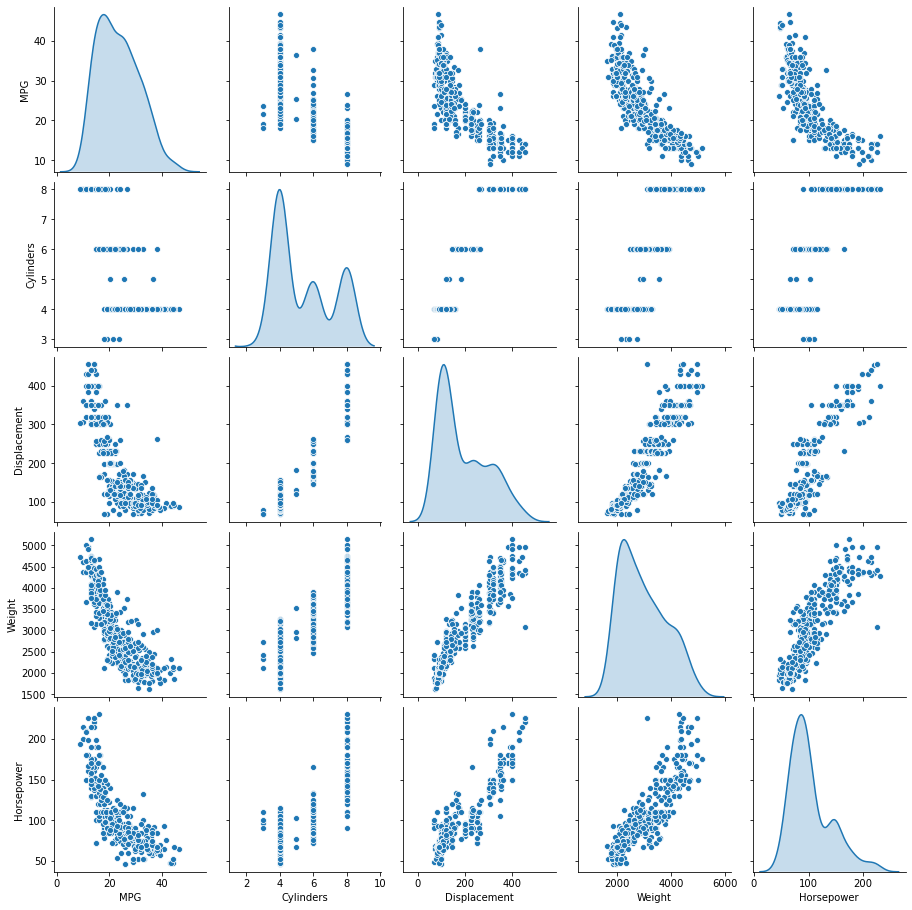

In [8]:
sns.pairplot(data[["MPG", "Cylinders", "Displacement", "Weight", "Horsepower"]], diag_kind="kde")

In [9]:
## Adding new variables by checking their correlation w.r.t. MPG
data['displacement_on_power'] = data['Displacement'] / data['Horsepower']
data['weight_on_cylinder'] = data['Weight'] / data['Cylinders']
data['acceleration_on_power'] = data['Acceleration'] / data['Horsepower']
data['acceleration_on_cyl'] = data['Acceleration'] / data['Cylinders']

corr_matrix = data.corr()
corr_matrix['MPG'].sort_values(ascending=False) ## Strong Correlation between new columns added and MPG

MPG                      1.000000
acceleration_on_cyl      0.732133
acceleration_on_power    0.704240
Model Year               0.579267
Origin                   0.563450
Acceleration             0.420289
weight_on_cylinder      -0.020778
displacement_on_power   -0.577236
Horsepower              -0.773453
Cylinders               -0.775396
Displacement            -0.804203
Weight                  -0.831741
Name: MPG, dtype: float64

In [10]:
##summary statistics of quantitative variables
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MPG,398.0,23.514573,7.815984,9.000000,17.500000,23.000000,29.000000,46.600000
Cylinders,398.0,5.454774,1.701004,3.000000,4.000000,4.000000,8.000000,8.000000
Displacement,398.0,193.425879,104.269838,68.000000,104.250000,148.500000,262.000000,455.000000
Horsepower,398.0,104.304020,38.222625,46.000000,76.000000,93.500000,125.000000,230.000000
Weight,398.0,2970.424623,846.841774,1613.000000,2223.750000,2803.500000,3608.000000,5140.000000
Acceleration,398.0,15.568090,2.757689,8.000000,13.825000,15.500000,17.175000,24.800000
Model Year,398.0,76.010050,3.697627,70.000000,73.000000,76.000000,79.000000,82.000000
Origin,398.0,1.572864,0.802055,1.000000,1.000000,1.000000,2.000000,3.000000
displacement_on_power,398.0,1.780691,0.506801,0.700000,1.358209,1.676098,2.177094,3.472222
weight_on_cylinder,398.0,554.087102,82.427775,385.750000,496.250000,541.437500,595.500000,906.666667


**Split the data for Model**

In [17]:
X = data.drop(['MPG'], axis = 1)
y = data['MPG']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

### Model Build

**Linear Regression**

In [19]:
lin = LinearRegression()
lin.fit(X_train, y_train)
preds = lin.predict(X_test)
mean_squared_error(y_test, preds, squared=False) #RMSE

2.724177609980016

In [20]:
lin.coef_

array([-3.52126718e+00,  4.01337635e-02, -6.29665510e-02,  2.17923174e-03,
       -6.86850544e-01,  8.16125292e-01,  6.19439971e-01, -4.84312526e+00,
       -3.39578585e-02,  3.74221551e+01,  4.65510547e-01])

**Support Vector Machines - Regression**

In [21]:
svr = SVR()
svr.fit(X_train, y_train)
preds = svr.predict(X_test)
mean_squared_error(y_test, preds, squared=False) #RMSE

4.124865436294565

**Random Forest Regression**

In [22]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
preds = rfr.predict(X_test)
mean_squared_error(y_test, preds, squared=False) #RMSE

2.3873377850651964

### Scale Data

In [23]:
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
XS_train, XS_test, ys_train, ys_test = train_test_split(scaled_data, y, test_size = 0.1, random_state = 42)

**Linear Regression - On Scaled Data**

In [24]:
lin = LinearRegression()
lin.fit(XS_train, ys_train)
preds = lin.predict(XS_test)
mean_squared_error(ys_test, preds, squared=False), lin.coef_

(2.7241776099800323,
 array([-5.98216094,  4.17948051, -2.4037214 ,  1.84314459, -1.8917391 ,
         3.01393313,  0.49620031, -2.4514168 , -2.79555209,  2.9780389 ,
         0.55132201]))

**Support Vector Machines - Regression - On Scaled Data**

In [25]:
svr = SVR()
svr.fit(XS_train, ys_train)
preds = svr.predict(XS_test)
mean_squared_error(ys_test, preds, squared=False)

3.2612283235323454

**Random Forest Regression - On Scaled Data**

In [26]:
rfr = RandomForestRegressor()
rfr.fit(XS_train, ys_train)
preds = rfr.predict(XS_test)
mean_squared_error(ys_test, preds, squared=False)

2.3530658618066753

### Summary

Model Evaluation - Root Mean Square Error, the lower the number the better the model. Winner is **Random Forest**.

**BaseLine**
1. Linear Reg - RMSE - 2.724177609980016
2. SVR  - RMSE - 4.124865436294565
3. Random Forest - RMSE - 2.3873377850651964

**On Scaled Data** 
1. Linear Reg - RMSE - 2.7241776099800323
2. SVR - RMSE - 3.2612283235323454
3. Random Forest - RMSE - 2.3530658618066753

**Tensorflow implementation on same dataset here - https://www.tensorflow.org/tutorials/keras/regression**